 # Priprema i vizualizacija podataka


## Early Predictor for Student Success Based on behavioural and Demographical Indicators

### Učitavanje podataka

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
vle = pd.read_csv("anonymisedData/vle.csv")

### Početni pogled podataka

➜ broj redaka i broj atributa (stupaca)

In [4]:
print('assessments:',assessments.shape)
print('courses:',courses.shape)
print('studentAssessment:',studentAssessment.shape)
print('courstudentInfo:',studentInfo.shape)
print('studentRegistration:',studentRegistration.shape)
print('studentVle:',studentVle.shape)
print('vle:',vle.shape)

assessments: (206, 6)
courses: (22, 3)
studentAssessment: (173912, 5)
courstudentInfo: (32593, 12)
studentRegistration: (32593, 5)
studentVle: (10655280, 6)
vle: (6364, 6)


➜ pregled prvih 5 redaka svake tablice

In [5]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [6]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [8]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [9]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [10]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [11]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


➜ tipovi atributa po tablicama

In [12]:
print('assessments:')
assessments.dtypes

assessments:


code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [13]:
print('courses:')
courses.dtypes

courses:


code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [14]:
print('studentAssessment:')
studentAssessment.dtypes

studentAssessment:


id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [15]:
print('studentInfo:')
studentInfo.dtypes

studentInfo:


code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [16]:
print('studentRegistration:')
studentRegistration.dtypes

studentRegistration:


code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [17]:
print('studentVle:')
studentVle.dtypes

studentVle:


code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

In [18]:
print('vle:')
vle.dtypes

vle:


id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

➜ diskriptivna statistika podataka - nad atributima tipa int64 i float64 primjenjuje funkcije koje opisuju numeričke podatke u stupcu:<br>
·  count :  broj vrijednosti koje nisu null <br>
·  mean :  prosjek stupca<br>
·  std :  standardna devijacija<br>
·  min :  najmanja vrijednost u stupcu<br>
·  25% :  prvi kvartal - vrijednost od koje je manje 25% podataka <br>
·  50% :  drugi kvartal - srednja vrijednost sortiranih podataka<br>
·  75% :  treći kvartal - vrijednost od koje je manje 75% podataka<br>
·  max :  najveća vrijednost u stupcu

In [19]:
assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [20]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [21]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [22]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [23]:
studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [24]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [25]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


### Nedostajuće vrijednosti

➜ nedostajućih vrijednosti ima u tablicama: assessments, studentAssessment, courstudentInfo, studentRegistration, vle<br>
➜ npr. u tablici assessments ima 11 nedostajućih vrijednosti

In [26]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [27]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [28]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [29]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [30]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [31]:
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [32]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

### Stršeći podatci

➜ stršeći podatci nalaze se u tablici assessments, atribut weight, vrijednost je 100, na grafu je prikazana točkom <br>
➜ tip grafa je kutijasti dijagram gdje imamo prikaz minimuma, maksimuma, donjega i gornjega kvartila te medijana podataka <br>
➜ prikazane su i stršeće vrijednosti u ostalim tablicama



<Axes: xlabel='weight'>

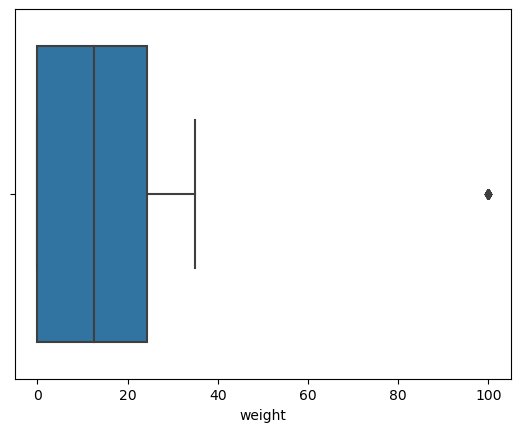

In [33]:
sns.boxplot(x=assessments['weight'])

<Axes: xlabel='is_banked'>

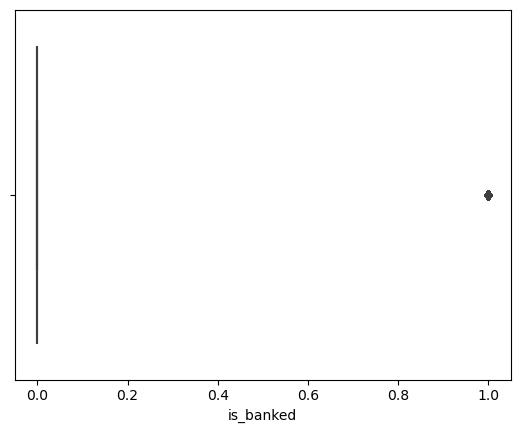

In [34]:
sns.boxplot(x=studentAssessment['is_banked'])

<Axes: xlabel='studied_credits'>

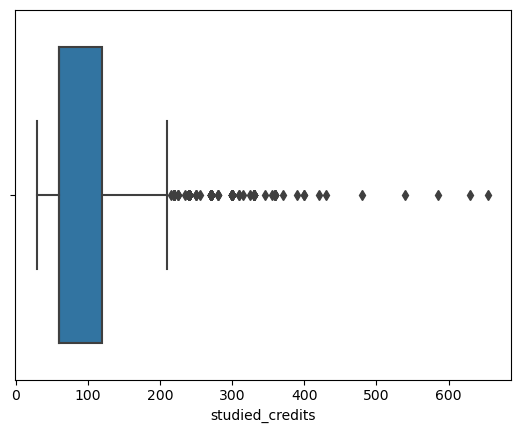

In [35]:
sns.boxplot(x=studentInfo['studied_credits'])

<Axes: xlabel='date_registration'>

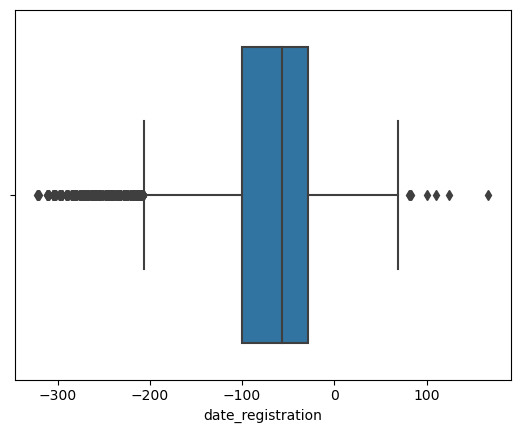

In [36]:
sns.boxplot(x=studentRegistration['date_registration'])

<Axes: xlabel='sum_click'>

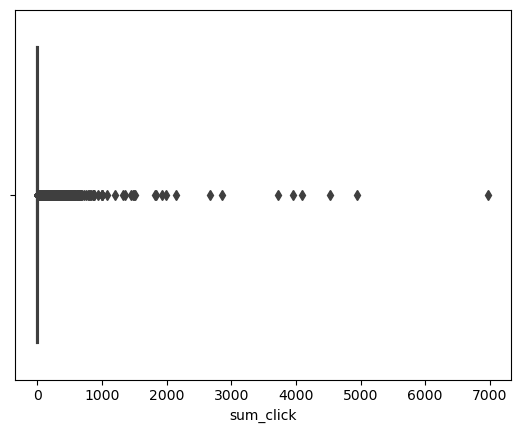

In [37]:
sns.boxplot(x=studentVle['sum_click'])

### Vizualizacije 

#### Assessments

➜ na stupičastom grafu prikazan je broj procjena po modulu

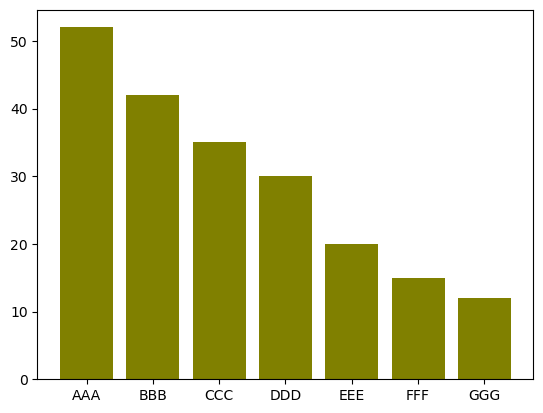

In [38]:
module = assessments['code_module'].unique()
module_count = assessments['code_module'].value_counts()

plt.bar(module, module_count, color='olive')

plt.show()

➜ pitin dijagram tipova provjera svim modula

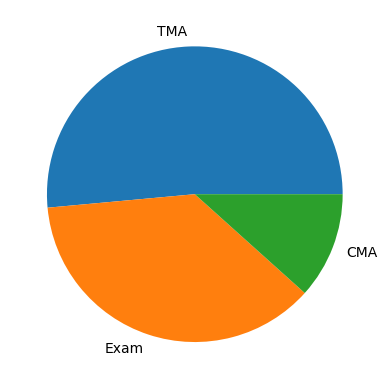

In [39]:
a_type = assessments['assessment_type'].value_counts()
percent = (a_type/len(assessments))*100
names = assessments['assessment_type'].unique()
plt.pie(percent, labels=names)
plt.show()

#### Courses

#### StudentAssessments

➜ linijski graf za ocjene jednog zadatka, id_assessment ="1752"

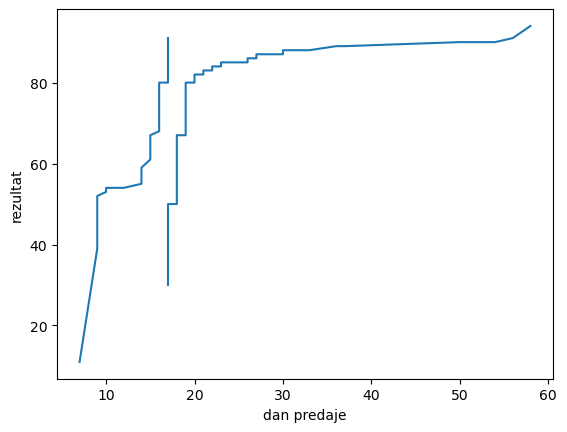

In [40]:
sorted_date = sorted(studentAssessment.date_submitted[:360])

plt.plot(sorted_date, studentAssessment.score[:360])

plt.xlabel('dan predaje')
plt.ylabel('rezultat')

plt.show()

#### StudentInfo

➜ na histogramu prikazani su studentski bodovi u ovisnosti o spolu studenta

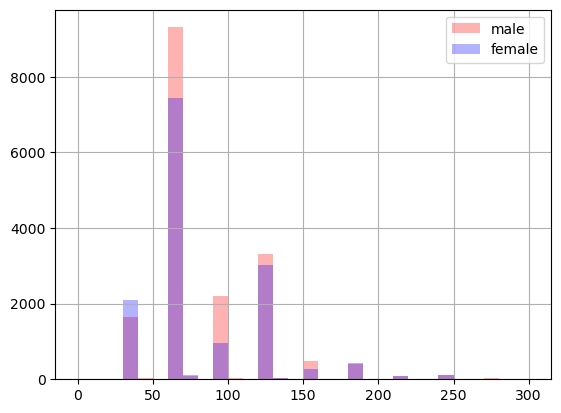

In [41]:
plt.hist(studentInfo[studentInfo.gender == "M"].studied_credits, bins = 30, range = (0,300), label='male', color='red', alpha=0.3)
plt.hist(studentInfo[studentInfo.gender == "F"].studied_credits, bins = 30, range = (0,300), label='female', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

➜ pitin dijagram regija iz kojih dolaze studenti

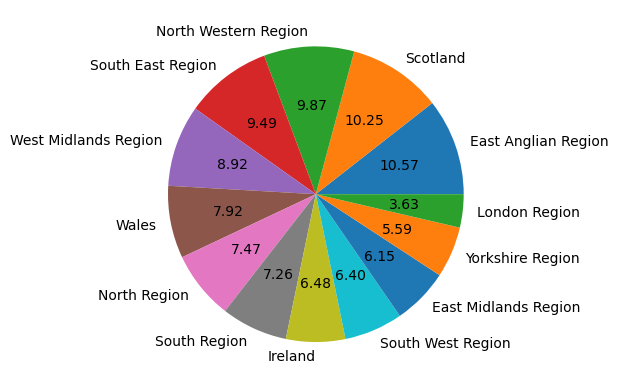

In [42]:
count_region = studentInfo['region'].value_counts()
name = studentInfo['region'].unique()
percent = (count_region/len(studentInfo))*100

plt.pie(percent, labels=name,autopct='%.2f' )

plt.show()


➜ mjehuričasti graf - ovisnost broja prethodnih pokušaja i studentskih bodova 

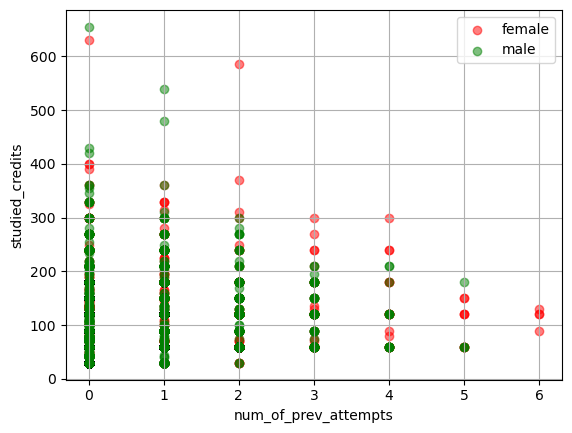

In [43]:

gender_M = studentInfo.gender == "M"

count_region = studentInfo['region'].value_counts()
name = studentInfo['region'].unique()

plt.scatter(studentInfo.loc[~gender_M,'num_of_prev_attempts'], studentInfo.loc[~gender_M,'studied_credits'], alpha=0.5, c='r', label='female')
plt.scatter(studentInfo.loc[gender_M,'num_of_prev_attempts'], studentInfo.loc[gender_M,'studied_credits'], alpha=0.5, c='g', label='male')
plt.xlabel('num_of_prev_attempts')
plt.ylabel('studied_credits')
plt.legend(loc='best')
plt.grid()
plt.show()

#### StudentRegistration

➜ linijski graf vremenskof trenutka registracije na tečaj,  broj se u danima od početka tečaja, prikazano za prvih 350 polaznika

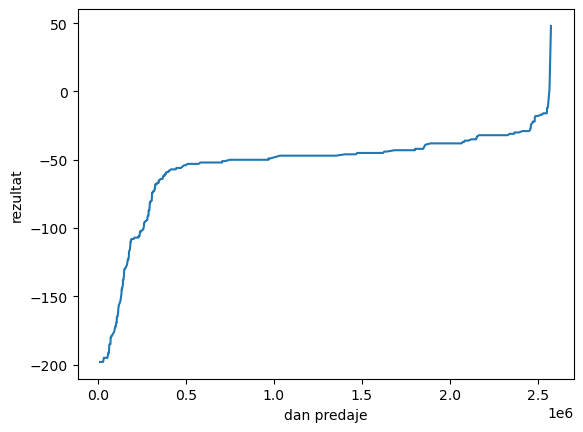

In [44]:
sorted_date = sorted(studentRegistration.date_registration[:350])

plt.plot(studentRegistration.id_student[:350],sorted_date)

plt.xlabel('dan predaje')
plt.ylabel('rezultat')

plt.show()

#### StudentVle

➜ graf raspršenja - prikazan broj klikova ovisno o trenutku interakcije sa materijalom, broji se u danima od početka kolegija

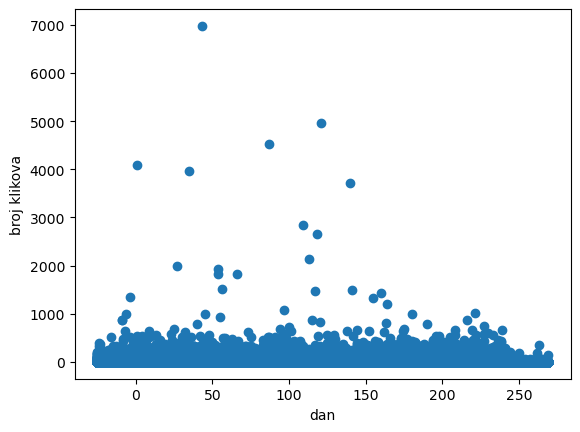

In [45]:
plt.scatter(studentVle.date, studentVle.sum_click)
plt.xlabel('dan')
plt.ylabel('broj klikova')
plt.show()

#### Vle

➜ stupčasti dijagram tipova aktivnosti

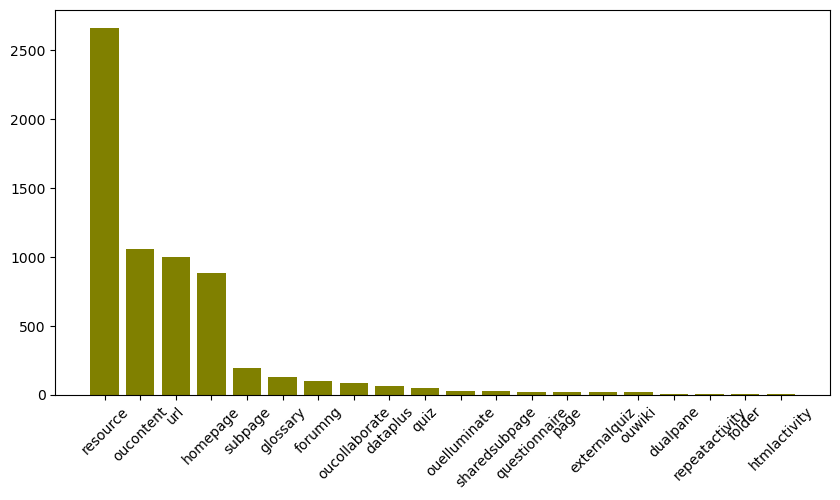

In [66]:

module = vle['activity_type'].unique()
module_count = vle['activity_type'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(module, module_count, color='olive')
plt.xticks(rotation=45)
plt.show()

OPIS

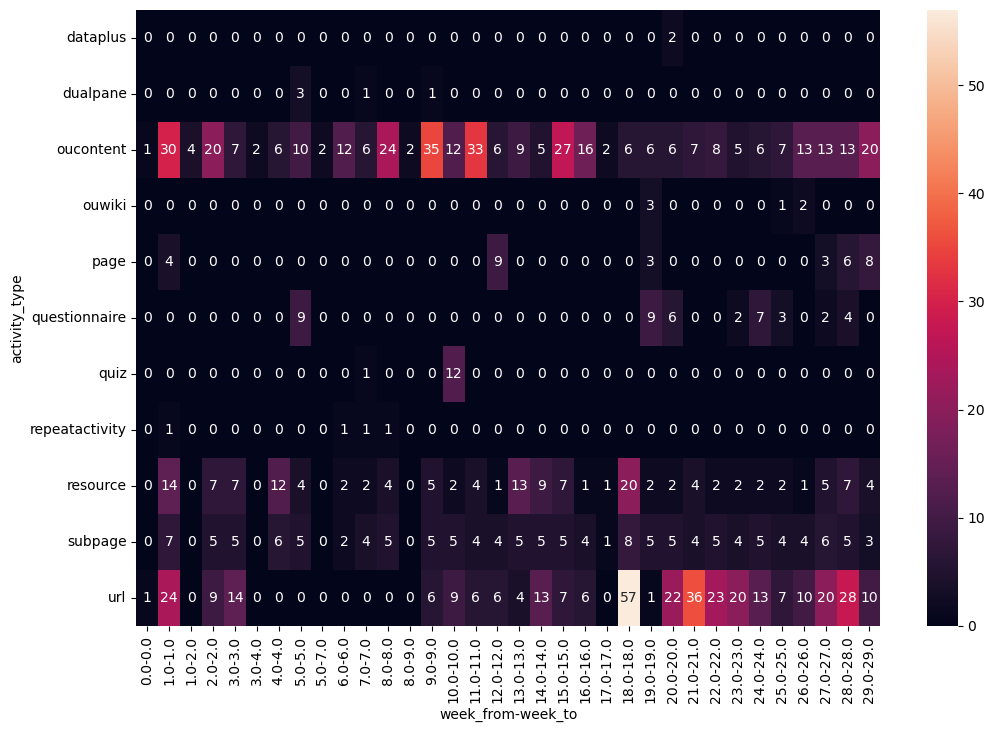

In [59]:
aktivnosti = vle.pivot_table(index='activity_type', columns=['week_from', 'week_to'], aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(aktivnosti, annot=True)
plt.show()

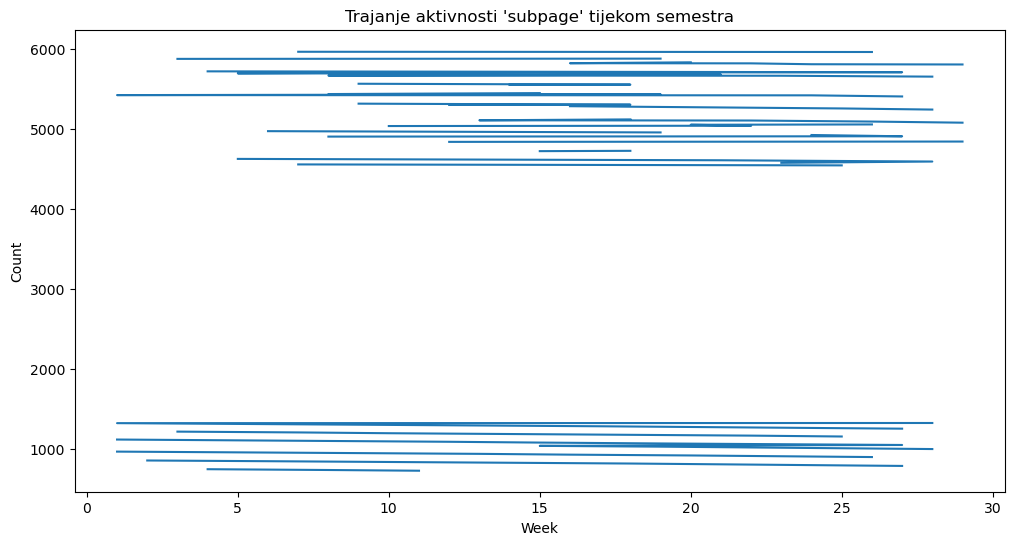

In [72]:
aktivnost = vle[vle['activity_type'] == "subpage"]

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(aktivnost['week_from'], aktivnost.index, marker='o')
plt.title("Trajanje aktivnosti 'subpage' tijekom semestra")
plt.xlabel("Week")
plt.ylabel("Count")
plt.show()